<a href="https://colab.research.google.com/github/AminHmimou/DataMine/blob/main/application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

In [ ]:
from pyspark import SparkContext

In [ ]:
sc = SparkContext(appName='myapp')

In [ ]:
print("The version of Spark Context in the PySpark shell is", sc.version)

The version of Spark Context in the PySpark shell is 3.5.3


In [ ]:
print("the python version is ", sc.pythonVer)

the python version is  3.10


In [ ]:
num = range(1, 101)

In [ ]:
spark_data = sc.parallelize(num)

In [ ]:
lines= sc.textFile("/content/README.md")

In [ ]:
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
print('input list is ', my_list)

input list is  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
squared_list = list(map(lambda x : x*x , my_list))

In [ ]:
print( 'the squared list is', squared_list)

the squared list is [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [ ]:
my_list2 = [10, 21, 31, 40, 51, 60, 72, 80, 93, 101]

In [ ]:
filtered_list = list(filter(lambda x : x%10 == 0 , my_list2))

In [ ]:
print('numbers divided by 10 are :', filtered_list)

numbers divided by 10 are : [10, 40, 60, 80]


In [ ]:
rdd= sc.parallelize(["spark","is","a","framework","for","big data processing"])

In [ ]:
print("the typeof rdd is :", type(rdd))

the typeof rdd is : <class 'pyspark.rdd.RDD'>


In [ ]:
filerdd= sc.textFile("/content/README.md")

In [ ]:
print("the type of filerdd is: ", type(filerdd))

the type of filerdd is:  <class 'pyspark.rdd.RDD'>


In [ ]:
print("the number of partitions in filrdd is:", filerdd.getNumPartitions())

the number of partitions in filrdd is: 2


In [ ]:
filerdd_part = sc.textFile("/content/README.md", minPartitions=5)

In [ ]:
print(filerdd_part.getNumPartitions())

5


In [ ]:
numbRDD = sc.parallelize([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
cuberdd= numbRDD.map(lambda x : x*x*x)

In [ ]:
numbers_all=cuberdd.collect()

In [ ]:
for numb in numbers_all :
  print(numb)

1
8
27
64
125
216
343
512
729
1000


In [ ]:
filerdd_filtered = filerdd.filter(lambda line : 'spark' in line)

In [ ]:
print("the total lines with spark key word is ", filerdd_filtered.count())

the total lines with spark key word is  0


In [ ]:
filerdd.collect()

['# 📈  Data Engineer with Python',
 '🧠 All tasks I carry out on courses and projects related to Data Engineering.',
 '',
 "Most of them are based on the tasks from the ['Career Track: Data Engineer with Python'](https://github.com/monikaglazz/Data_Engineering_with_Python/blob/main/Track_description.pdf) from www.datacamp.com",
 '',
 "['Career Track: Data Engineer with Python' - certificate](https://github.com/monikaglazz/Data_Engineering_with_Python/blob/main/Data_Engineer_Career_Track_certificate.pdf)",
 '',
 'If I have completed the course listed below, it means that you can find a confirmation certificate in the corresponding folder.',
 '',
 '',
 '![image](https://user-images.githubusercontent.com/84285130/217212070-2d5affaa-1625-4e45-957f-1ca31098aa4d.png)',
 '',
 '## 📒 Currently known technologies',
 '* Python (i.a.: numpy, matplotlib, pandas) - intermediate',
 '* SQL: MySQL, PostgreSQL - intermediate, basic',
 '* AWS (AWS Boto) - basic',
 '* MangoBD - basic',
 '* Scala - basic',


In [ ]:
Rdd = sc.parallelize([(1,2),(9,4),(1,6),(6,8),(9,10),(6,2)])

In [ ]:
rdd_reduced = Rdd.reduceByKey(lambda x,y : x+y)

In [ ]:
rdd_reduced.collect()

[(6, 10), (1, 8), (9, 14)]

In [ ]:
for num in rdd_reduced.collect():
  print('key {} has {} count value'.format(num[0], num[1]))

key 6 has 10 count value
key 1 has 8 count value
key 9 has 14 count value


In [ ]:
rdd_reduced_sort = rdd_reduced.sortByKey(ascending = False)

In [ ]:
rdd_reduced_sort.collect()

[(9, 14), (6, 10), (1, 8)]

In [ ]:
for num in rdd_reduced_sort.collect():
  print("key {} has {} counts".format(num[0], num[1]))

key 9 has 14 counts
key 6 has 10 counts
key 1 has 8 counts


In [ ]:
total=rdd.countByKey()

In [ ]:
print("the type of total is ", type(total))

the type of total is  <class 'collections.defaultdict'>


In [ ]:
total.items()

dict_items([('s', 1), ('i', 1), ('a', 1), ('f', 2), ('b', 1)])

In [ ]:
for k,v in total.items() :
  print('the key ', k , 'has' ,v ,'count')

the key  s has 1 count
the key  i has 1 count
the key  a has 1 count
the key  f has 2 count
the key  b has 1 count


In [ ]:
baseRdd = sc.textFile("/content/Complete_Shakespeare.txt")

In [ ]:
splitRDD = baseRdd.flatMap(lambda x: x.split())

In [ ]:
print("the total number of words in splitRDD is", splitRDD.count())

the total number of words in splitRDD is 128576


In [ ]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
              'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him',
              'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its',
              'itself', 'they', 'them', 'their', 'theirs', 'themselves',
              'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those',
              'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have',
              'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
              'the', 'and', 'but', 'if', 'or', 'because', 'as',
              'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about',
              'against', 'between', 'into', 'through', 'during', 'before',
              'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in',
              'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
              'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all',
              'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
              'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
              'too', 'very', 'can', 'will', 'just', 'don', 'should', 'now']


In [ ]:
splitRDD_no_stop = splitRDD.filter(lambda x: x.lower() not in stop_words)

In [ ]:
print("the total words in splitRDD_no_stop is :", splitRDD_no_stop.count())

the total words in splitRDD_no_stop is : 73305


In [ ]:
splitRDD_no_stop_words = splitRDD_no_stop.map(lambda w : (w,1))

In [ ]:
resultRDD= splitRDD_no_stop_words.reduceByKey(lambda x,y : x+y)

In [ ]:
for word in resultRDD.take(10):
  print(word)


('Project', 9)
('EBook', 1)
('Shakespeare', 12)
('use', 38)
('anyone', 1)
('anywhere', 1)
('restrictions', 1)
('whatsoever.', 1)
('may', 162)
('it,', 74)


In [ ]:
resultRDD_swap = resultRDD.map(lambda x: (x[0],x[1]))

In [ ]:
resultRDD_swap_sorted = resultRDD_swap.sortByKey(ascending = False)

In [ ]:
for word in resultRDD_swap_sorted.take(20):
  print("{},{}".format(word[0],word[1]))

zealous,2
youthful,6
youth?,1
youth;,2
youth.,9
youth-,1
youth,,15
youth's,1
youth!,1
youth,32
yourselves?,2
yourselves.,1
yourselves,,3
yourself?,2
yourself;,1
yourself:,1
yourself.,5
yourself,,9
yourself!,1
yours?,2


In [ ]:
sample_list = [('Mona', 20), ('Jennifer', 34),
               ('John', 20), ('Jim', 26)]

In [ ]:
rdd1= sc.parallelize(sample_list)

In [ ]:
from pyspark.sql import *

In [ ]:
spark= SparkSession.builder.getOrCreate()

In [ ]:
names_df= spark.createDataFrame(rdd1, schema=['Name','Age'])

In [ ]:
people_df= spark.read.csv("/content/people.csv", header = True, inferSchema=True)

In [ ]:
names_df.show(10)
people_df.show(10)

+--------+---+
|    Name|Age|
+--------+---+
|    Mona| 20|
|Jennifer| 34|
|    John| 20|
|     Jim| 26|
+--------+---+

+---+---------+----------------+------+-------------------+
|_c0|person_id|            name|   sex|      date of birth|
+---+---------+----------------+------+-------------------+
|  0|      100|  Penelope Lewis|female|1990-08-31 00:00:00|
|  1|      101|   David Anthony|  male|1971-10-14 00:00:00|
|  2|      102|       Ida Shipp|female|1962-05-24 00:00:00|
|  3|      103|    Joanna Moore|female|2017-03-10 00:00:00|
|  4|      104|  Lisandra Ortiz|female|2020-08-05 00:00:00|
|  5|      105|   David Simmons|  male|1999-12-30 00:00:00|
|  6|      106|   Edward Hudson|  male|1983-05-09 00:00:00|
|  7|      107|    Albert Jones|  male|1990-09-13 00:00:00|
|  8|      108|Leonard Cavender|  male|1958-08-08 00:00:00|
|  9|      109|  Everett Vadala|  male|2005-05-24 00:00:00|
+---+---------+----------------+------+-------------------+
only showing top 10 rows



In [ ]:
print('there are {} rows in peopel dataframe'.format(people_df.count()))

there are 100000 rows in peopel dataframe


In [ ]:
print('there are {} columns in people dataframe and their names are {}: '.format(len(people_df.columns), people_df.columns))

there are 5 columns in people dataframe and their names are ['_c0', 'person_id', 'name', 'sex', 'date of birth']: 


In [ ]:
people_sub = people_df.select("name","sex","date of birth")

In [ ]:
people_sub.show(10)

+----------------+------+-------------------+
|            name|   sex|      date of birth|
+----------------+------+-------------------+
|  Penelope Lewis|female|1990-08-31 00:00:00|
|   David Anthony|  male|1971-10-14 00:00:00|
|       Ida Shipp|female|1962-05-24 00:00:00|
|    Joanna Moore|female|2017-03-10 00:00:00|
|  Lisandra Ortiz|female|2020-08-05 00:00:00|
|   David Simmons|  male|1999-12-30 00:00:00|
|   Edward Hudson|  male|1983-05-09 00:00:00|
|    Albert Jones|  male|1990-09-13 00:00:00|
|Leonard Cavender|  male|1958-08-08 00:00:00|
|  Everett Vadala|  male|2005-05-24 00:00:00|
+----------------+------+-------------------+
only showing top 10 rows



In [ ]:
people_sub_nodup= people_sub.dropDuplicates()

In [ ]:
print("there was {} rows before and now there are {} rows".format(people_sub.count(), people_sub_nodup.count()))

there was 100000 rows before and now there are 99998 rows


In [ ]:
people_df.createOrReplaceTempView('people')

In [ ]:
query = "select name from people"

In [ ]:
people_names = spark.sql(query)

In [ ]:
people_names.show(10)

+----------------+
|            name|
+----------------+
|  Penelope Lewis|
|   David Anthony|
|       Ida Shipp|
|    Joanna Moore|
|  Lisandra Ortiz|
|   David Simmons|
|   Edward Hudson|
|    Albert Jones|
|Leonard Cavender|
|  Everett Vadala|
+----------------+
only showing top 10 rows



In [ ]:
female_df = spark.sql("select * from people where sex=='female' ")

In [ ]:
female_df.show(10)

+---+---------+-----------------+------+-------------------+
|_c0|person_id|             name|   sex|      date of birth|
+---+---------+-----------------+------+-------------------+
|  0|      100|   Penelope Lewis|female|1990-08-31 00:00:00|
|  2|      102|        Ida Shipp|female|1962-05-24 00:00:00|
|  3|      103|     Joanna Moore|female|2017-03-10 00:00:00|
|  4|      104|   Lisandra Ortiz|female|2020-08-05 00:00:00|
| 11|      111|Annabelle Rosseau|female|1989-07-13 00:00:00|
| 12|      112|    Eulah Emanuel|female|1976-01-19 00:00:00|
| 16|      116|   Carla Spickard|female|1985-06-13 00:00:00|
| 17|      117|Florence Eberhart|female|2024-06-01 00:00:00|
| 18|      118|     Tina Gaskins|female|1966-12-05 00:00:00|
| 19|      119| Florence Mulhern|female|1959-05-31 00:00:00|
+---+---------+-----------------+------+-------------------+
only showing top 10 rows



In [ ]:
male_df = spark.sql("select * from people where sex=='male' ")

In [ ]:
male_df.show(10)

+---+---------+-----------------+----+-------------------+
|_c0|person_id|             name| sex|      date of birth|
+---+---------+-----------------+----+-------------------+
|  1|      101|    David Anthony|male|1971-10-14 00:00:00|
|  5|      105|    David Simmons|male|1999-12-30 00:00:00|
|  6|      106|    Edward Hudson|male|1983-05-09 00:00:00|
|  7|      107|     Albert Jones|male|1990-09-13 00:00:00|
|  8|      108| Leonard Cavender|male|1958-08-08 00:00:00|
|  9|      109|   Everett Vadala|male|2005-05-24 00:00:00|
| 10|      110| Freddie Claridge|male|2002-05-07 00:00:00|
| 13|      113|       Shaun Love|male|1970-05-26 00:00:00|
| 14|      114|Alejandro Brennan|male|1980-12-22 00:00:00|
| 15|      115|Robert Mcreynolds|male|1973-12-27 00:00:00|
+---+---------+-----------------+----+-------------------+
only showing top 10 rows



In [ ]:
print("there are {} females and {} males".format(female_df.count(),male_df.count() ))

there are 49014 females and 49066 males


In [ ]:
print(names_df.columns)

['Name', 'Age']


In [ ]:
names_pd= names_df.toPandas()

In [ ]:
import matplotlib.pyplot as plt

AttributeError: 'Axes' object has no attribute 'plt'

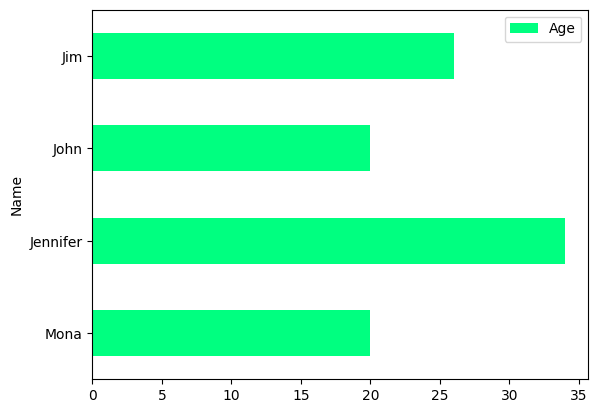

In [ ]:
names_pd.plot(kind='barh', x='Name', y='Age', colormap='winter_r').plt.show()

In [ ]:
fifa_df = spark.read.csv("/content/Fifa2018_dataset.csv", header = True, inferSchema= True)

In [ ]:
fifa_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


In [ ]:
fifa_df.show()

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [ ]:
print("there are {} rows in fifa dataframe".format(fifa_df.count()))

there are 17981 rows in fifa dataframe


In [ ]:
fifa_df.createOrReplaceTempView('fifa_table')

In [ ]:
fifa_germany_age = spark.sql("select age from fifa_table where Nationality=='Germany'")

In [ ]:
fifa_germany_age.describe().show()

+-------+-----------------+
|summary|              age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293757|
|    min|               16|
|    max|               36|
+-------+-----------------+

